In this notebook we make an example of how to use the EpidemicKabu library. For this, we use the unCoVer data about COVID-19 epidemic in different countries with  daily dates and cases reported between 2020 and 2022. All the data used is in "./data/" directory.

Importing the library

In [1]:
import sys
sys.path.append('/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/')
from kabu import curves
from kabuWaves import waves
from kabuPeaksValleys import peaksValleys
#import kabuPeaksValleys as pv
# como asi no se importa la librearia estos alias deben ser cambiados en las funciones
# de abajo!!!!!!!!!!!!!!!!!!!!!!!!


In [2]:
# importing other necesary libraries
import pandas as pd
import matplotlib.pyplot as plt

Defining the variables to use

In [3]:
# The dataframe with the columns dates and cases by date
database = pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/data/uncoverCountries.csv")
database = database[["Date_reported","Country_code","Country","New_cases"]]
databaseCOLOMBIA=database[database["Country_code"]=="GB"]
datesName = "Date_reported"
casesName = "New_cases"
databaseCOLOMBIA.head(3)

# The next dataframe has the kernel values for the countries
configFile= pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/data/configurationFile.csv")
configFile.head(3)

# the names of the output files
plotNameW = "Epidemic_curve_UK_W_exploringL"
dfNameW = "Epidemic_curve_UK_W_exploringL"
plotNamePV = "Epidemic_curve_UK_PV_exploringL"
dfNamePV = "Epidemic_curve_UK_PV_exploringL"

#Be sure to create the "./plots/" and "./dataframes" folder in the same folder in which you
#are running the code, or define the variables to set an specific directory
outFolderPlot= "/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/plots/"
outFolderDF= "/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/dataframes/"

# The threshols is optional by default is zero. We declarate them but ...
thresholdW = 0
thresholdPV = 0

Waves

/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/kabu.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df["Date_reported"]= pd.to_datetime(self.df["Date_reported"])
/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/kabu.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,outputNormalization] = df[inputNormalization]/df[inputNormalization].abs().max()
/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/kabu.py:98: SettingWithCopyWarning: 
A value is trying to b

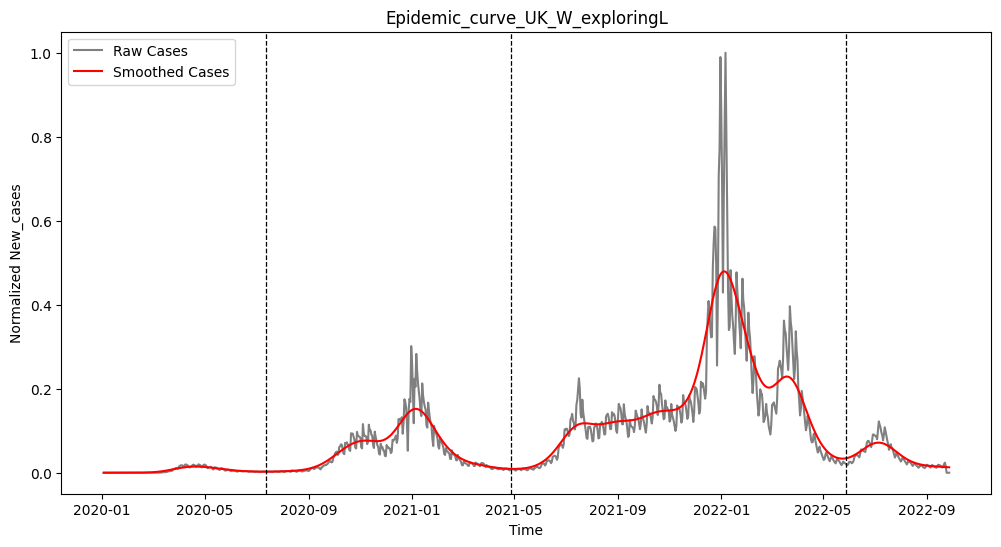

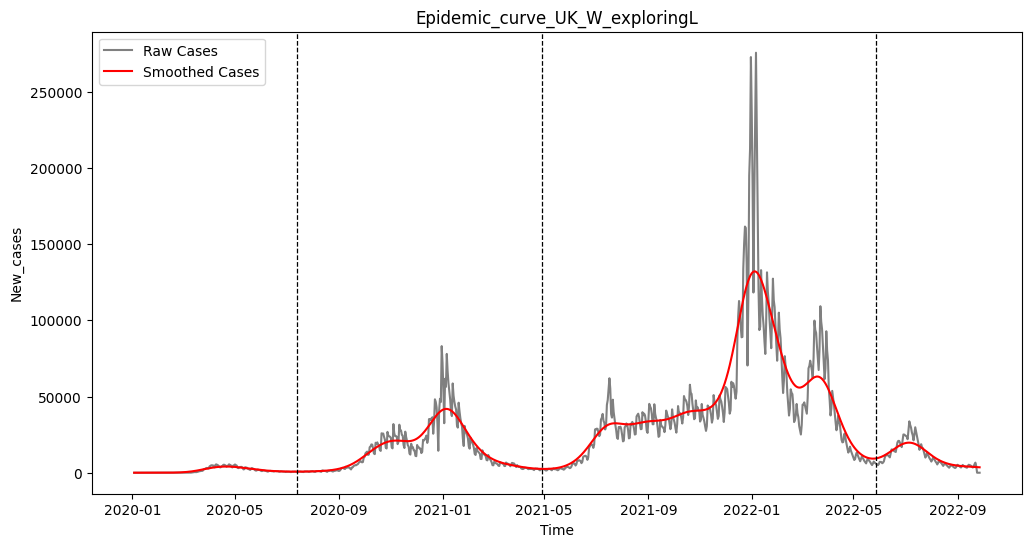

In [4]:
# A simplier version with a kernels as a number an without customize the attributes with default values
example = waves(databaseCOLOMBIA,datesName,casesName,30,30,plotNameW,dfNameW)
example.run()


In [11]:
example.__dict__

{'df':       Date_reported Country_code             Country  New_cases  \
 11988    2020-01-03           GB  The United Kingdom          0   
 11989    2020-01-04           GB  The United Kingdom          0   
 11990    2020-01-05           GB  The United Kingdom          0   
 11991    2020-01-06           GB  The United Kingdom          0   
 11992    2020-01-07           GB  The United Kingdom          0   
 ...             ...          ...                 ...        ...   
 12982    2022-09-23           GB  The United Kingdom       4280   
 12983    2022-09-24           GB  The United Kingdom          0   
 12984    2022-09-25           GB  The United Kingdom          0   
 12985    2022-09-26           GB  The United Kingdom          0   
 12986    2022-09-27           GB  The United Kingdom          0   
 
        NormalizedCases  gaussian  SmoothedNCases  SmoothedCases  \
 11988         0.000000  0.000000    4.495196e-07       0.123909   
 11989         0.000000  0.000000    4.9

In [12]:
example.df

,Date_reported,Country_code,Country,New_cases,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingFDS,cutDatesW
11988,2020-01-03,GB,The United Kingdom,0,0.000000,0.000000,4.495196e-07,0.123909,NaN,7.693214e-07,NaN,False,0
11989,2020-01-04,GB,The United Kingdom,0,0.000000,0.000000,4.998042e-07,0.137770,5.028466e-08,8.487886e-07,7.946720e-08,0.0,0
11990,2020-01-05,GB,The United Kingdom,0,0.000000,0.000000,5.555402e-07,0.153133,5.573603e-08,9.379797e-07,8.919110e-08,0.0,0
11991,2020-01-06,GB,The United Kingdom,0,0.000000,0.000000,6.173653e-07,0.170175,6.182509e-08,1.038115e-06,1.001357e-07,0.0,0
11992,2020-01-07,GB,The United Kingdom,0,0.000000,0.000000,6.860177e-07,0.189099,6.865240e-08,1.150563e-06,1.124480e-07,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12982,2022-09-23,GB,The United Kingdom,4280,0.015527,0.050004,1.344128e-02,3705.047553,-1.275683e-04,-1.809956e-04,4.618546e-06,0.0,0
12983,2022-09-24,GB,The United Kingdom,0,0.000000,0.050788,1.331310e-02,3669.715737,-1.281778e-04,-1.767429e-04,4.252745e-06,0.0,0
12984,2022-09-25,GB,The United Kingdom,0,0.000000,0.051356,1.318420e-02,3634.185952,-1.288960e-04,-1.728295e-04,3.913347e-06,0.0,0
12985,2022-09-26,GB,The United Kingdom,0,0.000000,0.051699,1.305451e-02,3598.437505,-1.296892e-04,-1.692306e-04,3.598922e-06,0.0,0


In [15]:
dir(curves)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_curves__gettingKernel',
 'curveNormalization',
 'curveSmoothing',
 'curveSmoothing2',
 'discreteDerivative',
 'plottingTheCurveNoNormalized',
 'plottingTheCurveNormalized',
 'run',
 'runAndPlot',
 'stansardizingDates']

In [17]:
?curves.plottingTheCurveNormalized

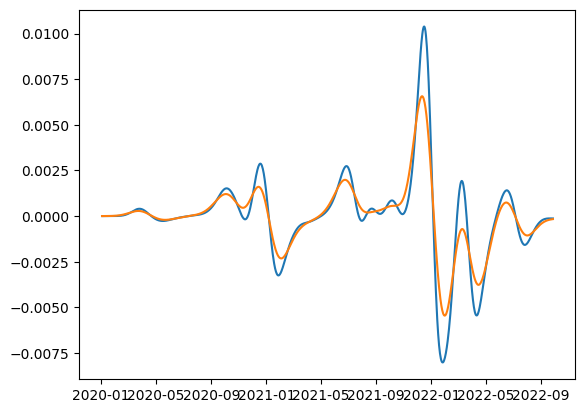

In [22]:
plt.plot(example.df["Date_reported"],example.df["FirstDerivate"])
plt.plot(example.df["Date_reported"],example.df["FirstDerivateSmoothed"])

In [29]:
# A simplier version with a kernels as a number an without customize the attributes with default values
def kernelPlot(k):
    example = curves(databaseCOLOMBIA,datesName,casesName,k,k,plotNameW,dfNameW)
    example.run()
    #return 
    plt.plot(example.df["Date_reported"],example.df["FirstDerivate"])
    plt.plot(example.df["Date_reported"],example.df["FirstDerivateSmoothed"])

/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/kabu.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, self.dN] = pd.to_datetime(df[self.dN])
/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/kabu.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,outputNormalization] = df[inputNormalization]/df[inputNormalization].abs().max()
/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/kabu.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy o

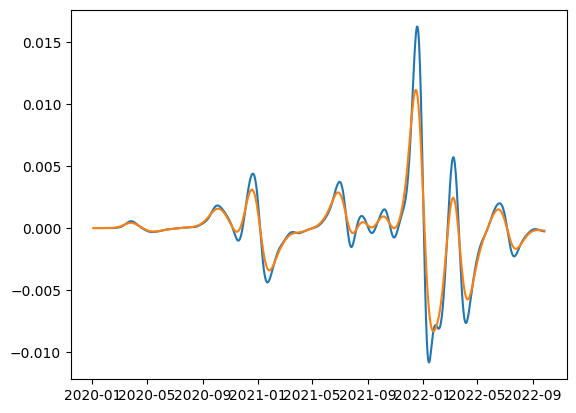

In [30]:
kernelPlot(20)

In [6]:
df=pd.read_csv("./dataframes/PV_Brazil.csv")

In [7]:
df.head()

,Unnamed: 0,Date_reported,New_cases,SmoothedCases,cutDatesPV
0,1998,2020-01-03,0,1.146454,0
1,1999,2020-01-04,0,1.278140,0
2,2000,2020-01-05,0,1.424564,0
3,2001,2020-01-06,0,1.587312,0
4,2002,2020-01-07,0,1.768134,0


In [8]:
df["new2"]=df["New_cases"]/df.New_cases.max()

In [9]:
df

,Unnamed: 0,Date_reported,New_cases,SmoothedCases,cutDatesPV,new2
0,1998,2020-01-03,0,1.146454,0,0.000000
1,1999,2020-01-04,0,1.278140,0,0.000000
2,2000,2020-01-05,0,1.424564,0,0.000000
3,2001,2020-01-06,0,1.587312,0,0.000000
4,2002,2020-01-07,0,1.768134,0,0.000000
...,...,...,...,...,...,...
994,2992,2022-09-23,7179,11993.427300,0,0.024058
995,2993,2022-09-24,8708,11820.062780,0,0.029182
996,2994,2022-09-25,7772,11652.810809,0,0.026045
997,2995,2022-09-26,6567,11491.458735,0,0.022007
